# Lab DD1334
Group members
*   Xinyang Li
*   Penglong Su
*   Weiqi Xie

# Lab Description
In the lab, we first obtained a csv file containing information about 20 students as well as assignments and grades, and used the SQL language, we chose SQLite as the DBMS to construct three tables with the student ID as the primary key and fused them into a complete table with the union function at the end. Supplemented by pandas, matplotlib and so on. We performed linear regression and prediction with the exam grade as the dependent variable and the average of the assignment grades as the independent variable, which  finally allowed the operator to input the grades of the two new assignments to predict the possible exam grades.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving assignment.csv to assignment.csv


In [2]:
import sqlite3
import pandas as pd

connection = sqlite3.connect("student.db")

create_table1 = '''CREATE TABLE IF NOT EXISTS information (
           ID TEXT NOT NULL, Name TEXT NOT NULL, Class TEXT NOT NULL, Teacher TEXT NOT NULL);
         '''

create_table2 = '''CREATE TABLE IF NOT EXISTS assignment (
           ID TEXT NOT NULL, Name TEXT NOT NULL, Exercise1 TEXT NOT NULL, Exercise2 TEXT NOT NULL, Lab1 TEXT NOT NULL, Lab2 TEXT NOT NULL);
         '''
create_table3 = '''CREATE TABLE IF NOT EXISTS exam (
           ID TEXT NOT NULL, Name TEXT NOT NULL, Grade1 TEXT NOT NULL, Grade2 TEXT NOT NULL);
         '''
connection.execute(create_table1)
connection.execute(create_table2)
connection.execute(create_table3)

df1 = pd.read_csv('information.csv')
df2 = pd.read_csv('assignment.csv')
df3 = pd.read_csv('exam.csv')

df1.to_sql('information', connection, if_exists='replace', index=False)
df2.to_sql('assignment', connection, if_exists='replace', index=False)
df3.to_sql('exam', connection, if_exists='replace', index=False)

connection.commit()

query1 = 'SELECT * FROM information'
result1 = connection.execute(query1)
data1 = result1.fetchall()

query2 = 'SELECT * FROM assignment'
result2 = connection.execute(query2)
data2 = result2.fetchall()

query3 = 'SELECT * FROM exam'
result3 = connection.execute(query3)
data3 = result3.fetchall()

print("Student Information:\n")
for row in enumerate(data1):
    print(row)

print("Student Assignment:\n")
for row in enumerate(data2):
    print(row)

print("Student Exam:\n")
for row in enumerate(data3):

    print(row)

Student Information:

(0, (20200001, 'John Smith', 20001, 'Olivia Turner'))
(1, (20200002, 'Sarah Johnson', 20001, 'Olivia Turner'))
(2, (20200003, 'Michael Brown', 20001, 'Olivia Turner'))
(3, (20200004, 'Emily Davis', 20001, 'Olivia Turner'))
(4, (20200005, 'David Wilson', 20001, 'Olivia Turner'))
(5, (20200006, 'Jennifer Anderson', 20002, 'Ethan Mitchell'))
(6, (20200007, 'Robert Taylor', 20002, 'Ethan Mitchell'))
(7, (20200008, 'Lisa Martinez', 20002, 'Ethan Mitchell'))
(8, (20200009, 'James Lee', 20002, 'Ethan Mitchell'))
(9, (20200010, 'Michelle Garcia', 20002, 'Ethan Mitchell'))
(10, (20200011, 'William Jackson', 20003, 'Sophia Carter'))
(11, (20200012, 'Jessica Miller', 20003, 'Sophia Carter'))
(12, (20200013, 'Richard Harris', 20003, 'Sophia Carter'))
(13, (20200014, 'Susan Clark', 20003, 'Sophia Carter'))
(14, (20200015, 'Christopher White', 20003, 'Sophia Carter'))
(15, (20200016, 'Mary Turner', 20004, 'Aiden Williams'))
(16, (20200017, 'Joseph Lewis', 20004, 'Aiden Williams

In [3]:
import sqlite3
connection = sqlite3.connect("student.db")
cursor1 = connection.cursor()

def merge():
    try:
      cursor1.execute("DROP TABLE IF EXISTS students")
      merge = '''CREATE TABLE students AS
            SELECT ID, Name, MAX(Class) AS Class, MAX(Teacher) AS Teacher, MAX(Exercise1) AS Exercise1, MAX(Exercise2) AS Exercise2, MAX(Lab1) AS Lab1, MAX(Lab2) AS Lab2, MAX(Grade1) AS Grade1, MAX(Grade2) AS Grade2
            FROM (
            SELECT ID, Name, Class, Teacher, NULL AS Exercise1, NULL AS Exercise2, NULL AS Lab1, NULL AS Lab2, NULL AS Grade1, NULL AS Grade2
            FROM information
            UNION ALL
            SELECT ID, Name, NULL AS Class, NULL AS Teacher, Exercise1, Exercise2, Lab1, Lab2, NULL AS Grade1, NULL AS Grade2
            FROM assignment
            UNION ALL
            SELECT ID, Name, NULL AS Class, NULL AS Teacher, NULL AS Exercise1, NULL AS Exercise2, NULL AS Lab1, NULL AS Lab2, Grade1, Grade2
            FROM exam
            ) AS combined_data
            GROUP BY ID, Name;'''

      cursor1.execute(merge)
      connection.commit()
    except sqlite3.Error as e:
        print ("Error message:", e.args[0])
        connection.rollback()
    exit()
merge()
query1 = 'SELECT * FROM students'
result1 = connection.execute(query1)
data1 = result1.fetchall()

for row in enumerate(data1):
    print(row)

(0, (20200001, 'John Smith', 20001, 'Olivia Turner', 72, 70, 81, 84, 70, 82))
(1, (20200002, 'Sarah Johnson', 20001, 'Olivia Turner', 89, 86, 90, 90, 89, 94))
(2, (20200003, 'Michael Brown', 20001, 'Olivia Turner', 65, 60, 78, 80, 66, 71))
(3, (20200004, 'Emily Davis', 20001, 'Olivia Turner', 84, 80, 79, 77, 80, 76))
(4, (20200005, 'David Wilson', 20001, 'Olivia Turner', 88, 80, 75, 82, 79, 79))
(5, (20200006, 'Jennifer Anderson', 20002, 'Ethan Mitchell', 60, 63, 60, 66, 65, 70))
(6, (20200007, 'Robert Taylor', 20002, 'Ethan Mitchell', 91, 90, 93, 95, 90, 98))
(7, (20200008, 'Lisa Martinez', 20002, 'Ethan Mitchell', 88, 89, 87, 88, 80, 90))
(8, (20200009, 'James Lee', 20002, 'Ethan Mitchell', 71, 71, 68, 67, 71, 69))
(9, (20200010, 'Michelle Garcia', 20002, 'Ethan Mitchell', 73, 80, 78, 74, 77, 77))
(10, (20200011, 'William Jackson', 20003, 'Sophia Carter', 80, 77, 93, 90, 80, 91))
(11, (20200012, 'Jessica Miller', 20003, 'Sophia Carter', 64, 54, 68, 70, 60, 68))
(12, (20200013, 'Richa

In [2]:
import sqlite3
connection = sqlite3.connect("student.db")
cursor1 = connection.cursor()
def average():
  try:
    query1 = "ALTER TABLE students ADD COLUMN Exercise FLOAT;"
    cursor1.execute(query1)
    query2 = "UPDATE students SET Exercise = (Exercise1 + Exercise2) / 2.0;"
    cursor1.execute(query2)
    query3 = "ALTER TABLE students ADD COLUMN Grade FLOAT;"
    cursor1.execute(query3)
    query4 = "UPDATE students SET Grade = (Grade1 + Grade2) / 2.0;"
    cursor1.execute(query4)
    connection.commit()
  except sqlite3.Error as e:
    print("Error message:", e.args[0])
    connection.rollback()

average()
query = 'SELECT * FROM students'
result = connection.execute(query)
data = result.fetchall()
for row in enumerate(data):
    print(row)

Error message: duplicate column name: Exercise
(0, (20200001, 'John Smith', 20001, 'Olivia Turner', 72, 70, 81, 84, 70, 82, 71.0, 76.0))
(1, (20200002, 'Sarah Johnson', 20001, 'Olivia Turner', 89, 86, 90, 90, 89, 94, 87.5, 91.5))
(2, (20200003, 'Michael Brown', 20001, 'Olivia Turner', 65, 60, 78, 80, 66, 71, 62.5, 68.5))
(3, (20200004, 'Emily Davis', 20001, 'Olivia Turner', 84, 80, 79, 77, 80, 76, 82.0, 78.0))
(4, (20200005, 'David Wilson', 20001, 'Olivia Turner', 88, 80, 75, 82, 79, 79, 84.0, 79.0))
(5, (20200006, 'Jennifer Anderson', 20002, 'Ethan Mitchell', 60, 63, 60, 66, 65, 70, 61.5, 67.5))
(6, (20200007, 'Robert Taylor', 20002, 'Ethan Mitchell', 91, 90, 93, 95, 90, 98, 90.5, 94.0))
(7, (20200008, 'Lisa Martinez', 20002, 'Ethan Mitchell', 88, 89, 87, 88, 80, 90, 88.5, 85.0))
(8, (20200009, 'James Lee', 20002, 'Ethan Mitchell', 71, 71, 68, 67, 71, 69, 71.0, 70.0))
(9, (20200010, 'Michelle Garcia', 20002, 'Ethan Mitchell', 73, 80, 78, 74, 77, 77, 76.5, 77.0))
(10, (20200011, 'Willi

SELECT Exercise, Grade FROM students:
x: [71.0, 87.5, 62.5, 82.0, 84.0, 61.5, 90.5, 88.5, 71.0, 76.5, 78.5, 59.0, 52.0, 71.5, 76.5, 83.5, 81.0, 82.5, 68.5, 89.5]
y: [76.0, 91.5, 68.5, 78.0, 79.0, 67.5, 94.0, 85.0, 70.0, 77.0, 85.5, 64.0, 51.0, 84.0, 75.5, 86.5, 75.0, 82.5, 71.0, 85.5]


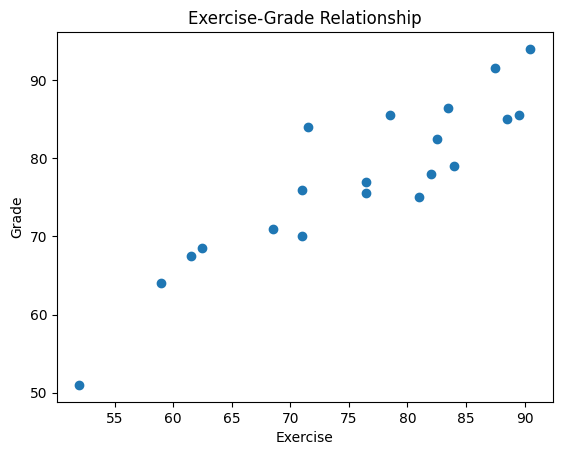

In [3]:
import sqlite3
import matplotlib.pyplot as plt
connection = sqlite3.connect("student.db")
cursor1 = connection.cursor()

def select():
    pick = "SELECT Exercise, Grade FROM students"
    print(pick + ":")
    try:
        cursor1.execute(pick)
        data = cursor1.fetchall()
        connection.commit()
    except sqlite3.Error as e:
        print("Error message:", e.args[0])
        connection.rollback()
        exit()
    x=[]
    y=[]
    for r in data:
        if (r[0]!=None and r[1]!=None):
            x.append(float(r[0]))
            y.append(float(r[1]))
        else:
            print("Dropped tuple",r)
    print("x:", x)
    print("y:", y)
    return [x,y]

[x,y]= select()
plt.scatter(x,y)
plt.title("Exercise-Grade Relationship")
plt.xlabel("Exercise")
plt.ylabel("Grade")
plt.show()

In [4]:
import numpy as np
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
connection = sqlite3.connect('student.db')
cursor1 = connection.cursor()
cursor1.execute('SELECT Exercise, Grade FROM students')
data = cursor1.fetchall()
connection.close()
data = np.array(data)

In [6]:
x = data[:, 0]
y = data[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"The linear regression prediction equation is：y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared:{r_value**2:.2f}")

The linear regression prediction equation is：y = 0.84x + 13.89
R-squared:0.81


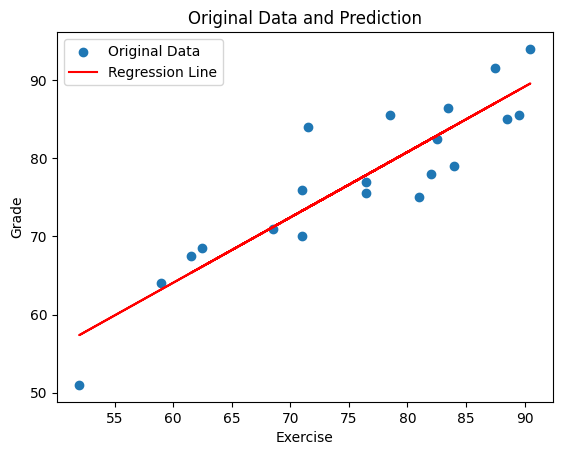

In [7]:
plt.scatter(x, y, label='Original Data')
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
plt.title("Original Data and Prediction")
plt.xlabel('Exercise')
plt.ylabel('Grade')
plt.legend(loc="best")
plt.savefig("Original Data and Prediction.png")
plt.show()

In [8]:
exercise_grade1, exercise_grade2 = map(float, input("Please enter the student's Exercise1 grade and Exercise2 grade (separated by a space): ").split())
new_x = (exercise_grade1 + exercise_grade2) / 2
predicted_y = slope * new_x + intercept
print(f"The student's test exam score is predicted to be {predicted_y:.2f}")

Please enter the student's Exercise1 grade and Exercise2 grade (separated by a space): 80 82
The student's test exam score is predicted to be 81.64


In [9]:
while True:
    try:
        primary_key = int(input("Please enter the student's ID："))
        if 20200001 <= primary_key <= 20200020:
            break
        else:
            print("Failed to find a student corresponding to this ID, please try again")
    except ValueError:
        print("Invalid entry, please enter a student ID。")

Please enter the student's ID：20200006


In [13]:
import sqlite3
connection = sqlite3.connect("student.db")
cursor1 = connection.cursor()
cursor1.execute("DROP TABLE IF EXISTS predicted_grade")
cursor1.execute("CREATE TABLE IF NOT EXISTS predicted_grade (primary_key TEXT, Exercise1 REAL, Exercise2 REAL, Grade REAL);")
grade_pred = round(predicted_y, 2)
cursor1.execute("INSERT INTO predicted_grade VALUES (?, ?, ?, ?)", (str(primary_key), exercise_grade1, exercise_grade2, grade_pred))
query = 'SELECT * FROM predicted_grade'
result = connection.execute(query)
data = result.fetchall()
for row in enumerate(data):
    print(row)
connection.commit()
connection.close()

(0, ('20200006', 80.0, 82.0, 81.64))
